### Imports

In [1]:
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras as keras
from sklearn.model_selection import train_test_split

### Load dataset

In [2]:
cifar10 = keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
print("Train Data: ")
print("Number of images: ",x_train.shape[0])
print(x_train.shape)    
print(y_train.shape)

print("\nTest Data: ")
print("Number of images: ",x_test.shape[0])
print(x_test.shape)
print(y_test.shape)

Train Data: 
Number of images:  50000
(50000, 32, 32, 3)
(50000, 1)

Test Data: 
Number of images:  10000
(10000, 32, 32, 3)
(10000, 1)


### 1. Prepare dataset for multiclasse

In [4]:
split = 0.8

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=split, random_state=42, shuffle=True, stratify=y_train)

# Converting all images to GRAY by OpenCV function
x_train = np.array(list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY), x_train)))
x_validation = np.array(list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY), x_validation)))
x_test = np.array(list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY), x_test)))

# Extending dimension from (n, height, width) to (n, height, width, one channel)
x_train = x_train[:, :, :, np.newaxis]
x_validation = x_validation[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [5]:
print("Train Data: ")
print("Number of images: ",x_train.shape[0])
print(x_train.shape)    
print(y_train.shape)

print("\nValidation Data: ")
print("Number of images: ",x_validation.shape[0])
print(x_validation.shape)
print(y_validation.shape)

print("\nTest Data: ")
print("Number of images: ",x_test.shape[0])
print(x_test.shape)
print(y_test.shape)

Train Data: 
Number of images:  10000
(10000, 32, 32, 1)
(10000, 1)

Validation Data: 
Number of images:  40000
(40000, 32, 32, 1)
(40000, 1)

Test Data: 
Number of images:  10000
(10000, 32, 32, 1)
(10000, 1)


In [6]:
y_train[(y_train == 0) | (y_train == 1) | (y_train == 8) | (y_train == 9)] = 1 
y_train[(y_train != 1)] = 0 

y_validation[(y_validation == 0) | (y_validation == 1) | (y_validation == 8) | (y_validation == 9)] = 1 
y_validation[(y_validation != 1)] = 0 

y_test[(y_test == 0) | (y_test == 1) | (y_test == 8) | (y_test == 9)] = 1 
y_test[(y_test != 1)] = 0 

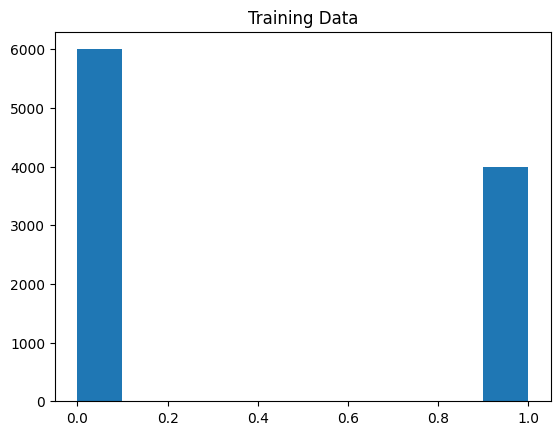

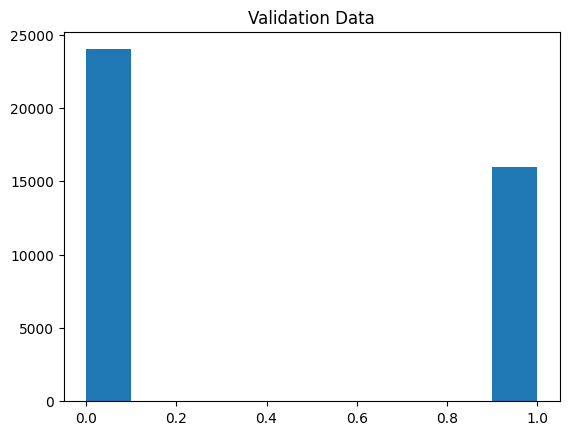

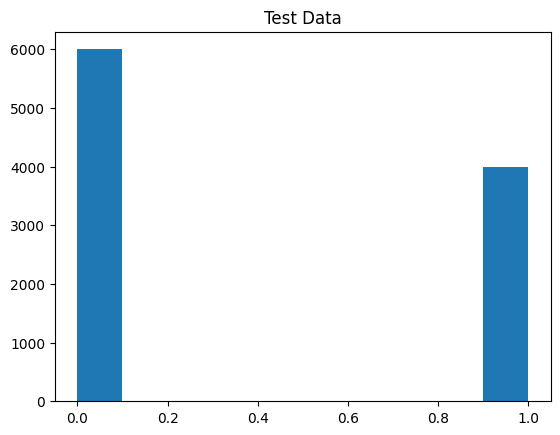

In [7]:
# Plot histograms of the data
plt.figure()
plt.hist(y_train, bins=10)
plt.title('Training Data')
plt.show()

plt.figure()
plt.hist(y_validation, bins=10)
plt.title('Validation Data')
plt.show()

plt.figure()
plt.hist(y_test, bins=10)
plt.title('Test Data')
plt.show()

--------


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train.reshape(-1, 32*32))
x_train_scaled = scaler.transform(x_train.reshape(-1, 32*32)).reshape(-1, 32, 32)

print(x_train_scaled[0, 0, :5])


[-0.7388531  -0.81170647 -0.82014962 -0.73061616 -0.80061111]


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8).fit(x_train_scaled.reshape(-1, 32*32))

print('Number of components:', pca.n_components_)
print('Explained variance:  ', pca.explained_variance_ratio_.sum())


Number of components: 27
Explained variance:   0.8004680442514084


--------

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# With PCA Scaled Data
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(pca.transform(x_train_scaled.reshape(-1, 32*32)), y_train.ravel())
svc = SVC(kernel='rbf', random_state=42).fit(pca.transform(x_train_scaled.reshape(-1, 32*32)), y_train.ravel())

x_validation_scaled = scaler.transform(x_validation.reshape(-1, 32*32)).reshape(-1, 32, 32)

print('Random Forest score:', rf.score(pca.transform(x_validation_scaled.reshape(-1, 32*32)), y_validation.ravel()))
print('SVC score:          ', svc.score(pca.transform(x_validation_scaled.reshape(-1, 32*32)), y_validation.ravel()))



""" models = [RandomForestClassifier(n_estimators=100, random_state=42),
          SVC(kernel='rbf', random_state=42)]

decision_functions = []

for model in models:
    model.fit(pca.transform(x_train_scaled.reshape(-1, 32*32)), y_train.ravel())

    try: 
        decision_functions.append(model.decision_function(pca.transform(x_validation.reshape(-1, 32*32))))
    except: 
        decision_functions.append(model.predict_proba(pca.transform(x_validation.reshape(-1, 32*32))))
 """

Random Forest score: 0.78505
SVC score:           0.805175


" models = [RandomForestClassifier(n_estimators=100, random_state=42),\n          SVC(kernel='rbf', random_state=42)]\n\ndecision_functions = []\n\nfor model in models:\n    model.fit(pca.transform(x_train_scaled.reshape(-1, 32*32)), y_train.ravel())\n\n    try: \n        decision_functions.append(model.decision_function(pca.transform(x_validation.reshape(-1, 32*32))))\n    except: \n        decision_functions.append(model.predict_proba(pca.transform(x_validation.reshape(-1, 32*32))))\n "

In [11]:
# With PCA without scaling
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(pca.transform(x_train.reshape(-1, 32*32)), y_train.ravel())
svc = SVC(kernel='rbf', random_state=42).fit(pca.transform(x_train.reshape(-1, 32*32)), y_train.ravel())

print('Random Forest score:', rf.score(pca.transform(x_validation.reshape(-1, 32*32)), y_validation.ravel()))
print('SVC score:          ', svc.score(pca.transform(x_validation.reshape(-1, 32*32)), y_validation.ravel()))


Random Forest score: 0.78045
SVC score:           0.772675


In [12]:
# With original data
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train.reshape(-1, 32*32), y_train.ravel())
svc = SVC(kernel='rbf', random_state=42).fit(x_train.reshape(-1, 32*32), y_train.ravel())

print('Random Forest score:', rf.score(x_validation.reshape(-1, 32*32), y_validation.ravel()))
print('SVC score:          ', svc.score(x_validation.reshape(-1, 32*32), y_validation.ravel()))

Random Forest score: 0.78145
SVC score:           0.80515


In [13]:
# With only scaled data
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train_scaled.reshape(-1, 32*32), y_train.ravel())
svc = SVC(kernel='rbf', random_state=42).fit(x_train_scaled.reshape(-1, 32*32), y_train.ravel())

x_validation_scaled = scaler.transform(x_validation.reshape(-1, 32*32)).reshape(-1, 32, 32)

print('Random Forest score:', rf.score(x_validation_scaled.reshape(-1, 32*32), y_validation.ravel()))
print('SVC score:          ', svc.score(x_validation_scaled.reshape(-1, 32*32), y_validation.ravel()))

Random Forest score: 0.78165
SVC score:           0.807625
